![alt text](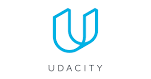 "Udacity") ![alt text](https://www.miskacademy.edu.sa/app/themes/misk-academy/images/logos.png "Misk") 




# Project: Communicate Data Findings: Metro Bike-Share Data
## by: Almutairi, Muhanned
![alt text](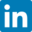 "LinkedIn profile")[LinkedIn profile](https://www.linkedin.com/in/muhanned-almutairi-5bb1a5a0/)

This project was one of the projects for Udacity nano degree. The project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process. In the first part, you will use Python visualization libraries to systematically explore a selected dataset, starting from plots of single variables and building up to plots of multiple variables. In the second part, you will produce a short presentation that illustrates interesting properties, trends, and relationships that you discovered in your selected dataset. The primary method of conveying your findings will be through transforming your exploratory visualizations from the first part into polished, explanatory visualizations.

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#Gathering)
- [Cleaning data](#Cleaning)
- [Univariate Exploration](#Uni)
- [Bivariate Exploration](#Bi)
- [Multivariate Exploration](#Mult)
- [Takeaway](#Take)

<a id='intro'></a>
## Introduction

[Metro Bike Share](https://en.wikipedia.org/wiki/Metro_Bike_Share)  is a bicycle sharing system in the Los Angeles, California metropolitan area. The service was launched on July 7, 2016. It is administered by the Los Angeles County Metropolitan Transportation Authority (Metro) and is operated by Bicycle Transit Systems. The system uses a fleet of about 1,400 bikes and includes 93 stations in Downtown Los Angeles, Venice, and the Port of Los Angeles. The dataset used for this exploratory analysis consists of [monthly individual trip data](https://bikeshare.metro.net/about/data/) from January 2019 to December 2019 in CSV format.

Each .csv file contains data for one quarter of the year. Each file contains the following data points:
* trip_id: Locally unique integer that identifies the trip
* duration: Length of trip in minutes
* start_time: The date/time when the trip began, presented in ISO 8601 format in local time
* end_time: The date/time when the trip ended, presented in ISO 8601 format in local time
* start_station: The station ID where the trip originated (for station name and more information on each station see the Station Table)
* start_lat: The latitude of the station where the trip originated
* start_lon: The longitude of the station where the trip originated
* end_station: The station ID where the trip terminated (for station name and more information on each station see the Station Table)
* end_lat: The latitude of the station where the trip terminated
* end_lon: The longitude of the station where the trip terminated
* bike_id:  Locally unique integer that identifies the bike
* plan_duration: The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up)
* trip_route_category: "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips
* passholder_type: The name of the passholder's plan
* bike_type: The kind of bike used on the trip, including standard pedal-powered bikes, electric assist bikes, or smart bikes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

<a id='Gathering'></a>
## Gathering and Assessing Data

In [2]:
# append all trip data together

folder_name = 'Data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
T = pd.concat(frames, ignore_index=True)
print(T.shape)
T.sample(5)

/Users/muhanned/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(290342, 15)


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
68589,124922269,28,7/5/2019 10:32,7/5/2019 11:00,4345,33.995560,-118.481552,4344,34.014309,-118.491341,15881,1,One Way,Walk-up,smart
158170,112705321,10,2019-01-03 13:28:00,2019-01-03 13:38:00,3076,34.040600,-118.253838,3016,34.052898,-118.241562,06308,30,One Way,Monthly Pass,standard
51651,123755036,15,2019-06-17 19:29:00,2019-06-17 19:44:00,4246,34.023708,-118.279167,4300,34.048870,-118.274300,6162,30,One Way,Monthly Pass,standard
214331,130072988,1,2019-10-01 10:38:55,2019-10-01 10:39:02,3032,34.049889,-118.255882,3032,34.049889,-118.255882,12252,365,Round Trip,Walk-up,standard
31351,121995650,75,2019-05-22 08:40:00,2019-05-22 09:55:00,3014,34.056610,-118.237213,3014,34.056610,-118.237213,6320,1,Round Trip,Walk-up,standard


In [3]:
# save the appended result to a .csv for further usage
T.to_csv('trip_data_metro.csv', index=False)

In [4]:
# Read teh file
trips = pd.read_csv('trip_data_metro.csv')
trips.head()

/Users/muhanned/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,118571839,7,2019-04-01 00:02:00,2019-04-01 00:09:00,3069,34.050880,-118.248253,3034,34.042061,-118.263382,6459,1,One Way,Walk-up,standard
1,118574695,12,2019-04-01 00:56:00,2019-04-01 01:08:00,3031,34.044701,-118.252441,4311,34.059689,-118.294662,12229,30,One Way,Monthly Pass,standard
2,118575167,12,2019-04-01 01:06:00,2019-04-01 01:18:00,3038,34.046822,-118.248352,3082,34.046520,-118.237411,6422,1,One Way,Walk-up,standard
3,118577060,48,2019-04-01 01:08:00,2019-04-01 01:56:00,3068,34.053200,-118.250954,3005,34.048500,-118.258537,12211,30,One Way,Monthly Pass,standard
4,118575166,9,2019-04-01 01:09:00,2019-04-01 01:18:00,3038,34.046822,-118.248352,3082,34.046520,-118.237411,12005,1,One Way,Walk-up,standard


In [5]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290342 entries, 0 to 290341
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              290342 non-null  int64  
 1   duration             290342 non-null  int64  
 2   start_time           290342 non-null  object 
 3   end_time             290342 non-null  object 
 4   start_station        290342 non-null  int64  
 5   start_lat            285505 non-null  float64
 6   start_lon            285505 non-null  float64
 7   end_station          290342 non-null  int64  
 8   end_lat              279757 non-null  float64
 9   end_lon              279757 non-null  float64
 10  bike_id              290342 non-null  object 
 11  plan_duration        290342 non-null  int64  
 12  trip_route_category  290342 non-null  object 
 13  passholder_type      290342 non-null  object 
 14  bike_type            290342 non-null  object 
dtypes: float64(4), in

In [6]:
# check for the null
trips.isnull().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_station              0
start_lat               4837
start_lon               4837
end_station                0
end_lat                10585
end_lon                10585
bike_id                    0
plan_duration              0
trip_route_category        0
passholder_type            0
bike_type                  0
dtype: int64

In [7]:
# and for the duplicated
trips.duplicated().sum()

0

In [8]:
# check for the user types
trips.passholder_type.value_counts()

Monthly Pass    172665
Walk-up          80854
Annual Pass      21659
One Day Pass     14731
Flex Pass          320
Testing            113
Name: passholder_type, dtype: int64

In [9]:
trips.duration.describe()

count    290342.000000
mean         31.080798
std         119.910178
min           1.000000
25%           6.000000
50%          11.000000
75%          22.000000
max        1440.000000
Name: duration, dtype: float64

<a id='Cleaning'></a>
## Cleaning Data

In [10]:
# make a copy of the dataframe 
df = trips.copy()

# issue 1: fix multiple fields of intersts that are not in the correct dtype
df['start_time'] = pd.to_datetime(df['start_time'])

df['trip_route_category'] = df['trip_route_category'].astype('category')
df['passholder_type'] = df['passholder_type'].astype('category')
df['bike_type'] = df['bike_type'].astype('category')


df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290342 entries, 0 to 290341
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              290342 non-null  int64         
 1   duration             290342 non-null  int64         
 2   start_time           290342 non-null  datetime64[ns]
 3   end_time             290342 non-null  object        
 4   start_station        290342 non-null  int64         
 5   start_lat            285505 non-null  float64       
 6   start_lon            285505 non-null  float64       
 7   end_station          290342 non-null  int64         
 8   end_lat              279757 non-null  float64       
 9   end_lon              279757 non-null  float64       
 10  bike_id              290342 non-null  object        
 11  plan_duration        290342 non-null  int64         
 12  trip_route_category  290342 non-null  category      
 13  passholder_typ

In [11]:
# issue 2: Create new columns for weekdays/ months/ year
# Then create day of the week column
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['weekday'] = df['start_time'].dt.dayofweek.map(dayOfWeek)
# as well for the month column
months = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
          7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['month'] = df['start_time'].dt.month.map(months)

# then fix new fields that are not in the correct dtype
df['weekday'] = df['weekday'].astype('category')
df['month'] = df['month'].astype('category')

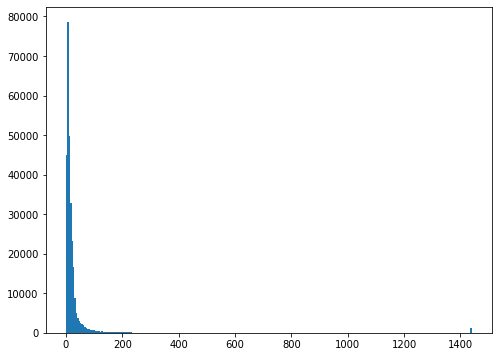

In [12]:
# plot the distribution of duration, visually examine for some outliers

plt.figure(figsize=[8, 6])
bins = np.arange(0, df['duration'].max()+5, 5)
plt.hist(df['duration'].dropna(), bins=bins);

### The structure of the dataset

The original combined data contains approximately 271,748 individual trip records with 17 variables collected. The variables can be divided into 3 major categories:
- trip duration: `duration`, `start_time`, `end_time`

- station info: `start_station`, `start_lat`, `start_lon`, `end_station`, `end_lat`, `end_lon`

- info (anonymized): `bike_id`, `plan_duration`

Derived features/variables to assist exploration and analysis:
- trip info: `trip_id`, `trip_route_category` ,`month` , `weekday`, 

- user types: `passholder_type`


### The main features of interest in the dataset

> I'm most interested in exploring the bike trips' duration and rental events occurrance patterns, along with how these relate to the riders' characteristics, i.e. their user type,to get a sense of how and what people are using the bike sharing service for. Sample questions to answer: When are most trips taken in terms of day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?


> Each trip's start date and duration information will help understanding how long a trip usually takes and when. The other information like user type will help us find out who are the main target customer groups, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

<a id='Uni'></a>
## Univariate Exploration

A series of plots to first explore the trips distribution over day-of-week and month.

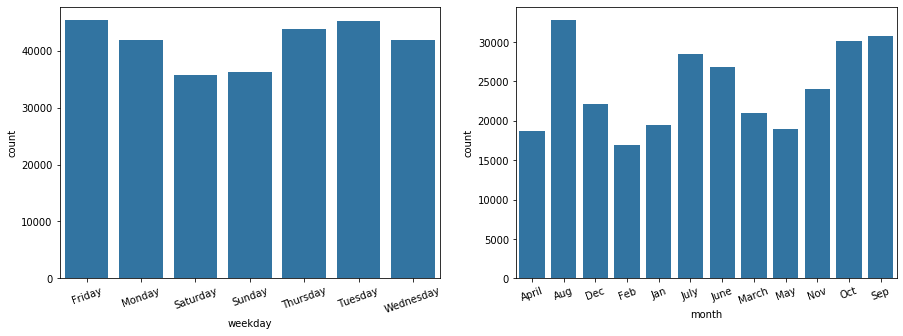

In [13]:
#Getting distribution using Seaborn bar plot 
plt.figure(figsize = [15,5])
base_color=sb.color_palette()[0]

# trip distribution over weekday
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
g=sb.countplot(data = df, x = 'weekday', color=base_color)
plt.xticks(rotation=20)

# trip distribution over months
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
g=sb.countplot(data = df, x = 'month', color=base_color)
plt.xticks(rotation=20);

> Looking in combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on work days (Mon-Fri) and primary usage is probably for commuting. In the 12 months in 2019, August had the most ride trips compared to the others, but overall it was the most popular during summer time (June-October), probably due to the weather in the area.   


The next several plots are around users/bikes to see what makes up of the riders.

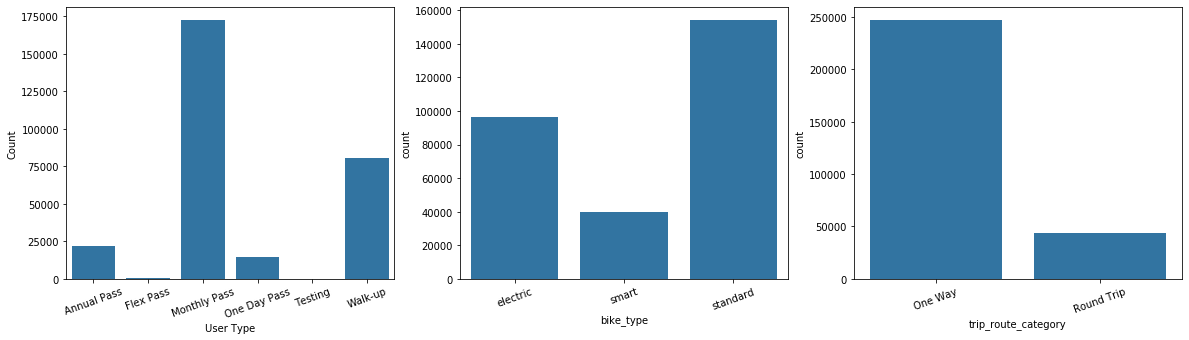

In [14]:
plt.figure(figsize = [20,5])
# trip distribution over weekday
plt.subplot(1, 3, 1) # 1 row, 2 cols, subplot 1
g=sb.countplot(data = df, x = 'passholder_type', color=base_color)
plt.xlabel('User Type');
plt.ylabel('Count');
plt.xticks(rotation=20)

# trip distribution over months
plt.subplot(1, 3, 2) # 1 row, 2 cols, subplot 2
g=sb.countplot(data = df, x = 'bike_type', color=base_color)
plt.xticks(rotation=20);

plt.subplot(1, 3, 3) # 1 row, 2 cols, subplot 2
g=sb.countplot(data = df, x = 'trip_route_category', color=base_color)
plt.xticks(rotation=20);

> The figures above show that the users who have monthly pass are the main end-users with the highest trips per year. And more than half of the total trips were done by using a standard type of bikes. Indeed, More than two-third of trips were booked a one-way trip, larger than a round trip.

Trip duration distribution to plot next. 

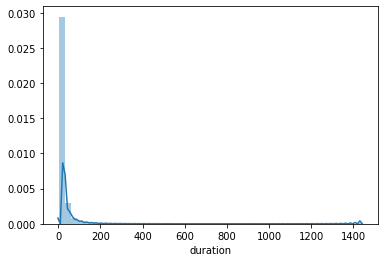

In [15]:
sb.distplot(df['duration'])

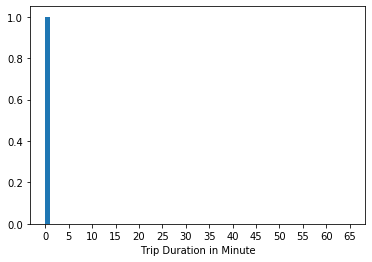

In [16]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

> It looks like 99% of the trips were less than 1 hour long with most of them fell between 5 to 10 minutes range. I'll remove the outlier long trips for this study to allow focusing on the most common cases to explore the pattern.

In [17]:
# issue 3: filter out outlier duration from visually examination of the distribution above
# over 60 would be not be further analysised
df = df.query('duration <= 60')
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271748 entries, 0 to 290341
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              271748 non-null  int64         
 1   duration             271748 non-null  int64         
 2   start_time           271748 non-null  datetime64[ns]
 3   end_time             271748 non-null  object        
 4   start_station        271748 non-null  int64         
 5   start_lat            267464 non-null  float64       
 6   start_lon            267464 non-null  float64       
 7   end_station          271748 non-null  int64         
 8   end_lat              263151 non-null  float64       
 9   end_lon              263151 non-null  float64       
 10  bike_id              271748 non-null  object        
 11  plan_duration        271748 non-null  int64         
 12  trip_route_category  271748 non-null  category      
 13  passholder_typ

In [18]:
# save the clean data to a .csv file
df.to_csv('trips_clean.csv', index=False)

<a id='Bi'></a>
## Bivariate Exploration

How does the trip duration distribution vary between user types?

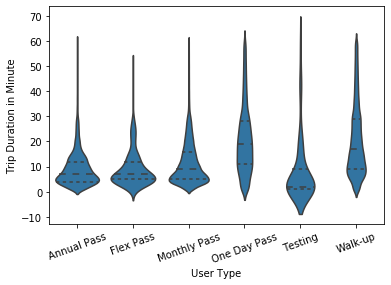

In [19]:
sb.violinplot(data=df, x='passholder_type', y='duration', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute')
plt.xticks(rotation=20);

> The trip duration distribution is much narrower for one day- pass holder compared to other riders on the shorter/quicker trip end overall. It seems like annual-pass & flex-pass holders have a more specific usage or targeted goal riding the bikes compared to other customers.

Average trip duration by month/ weekday.

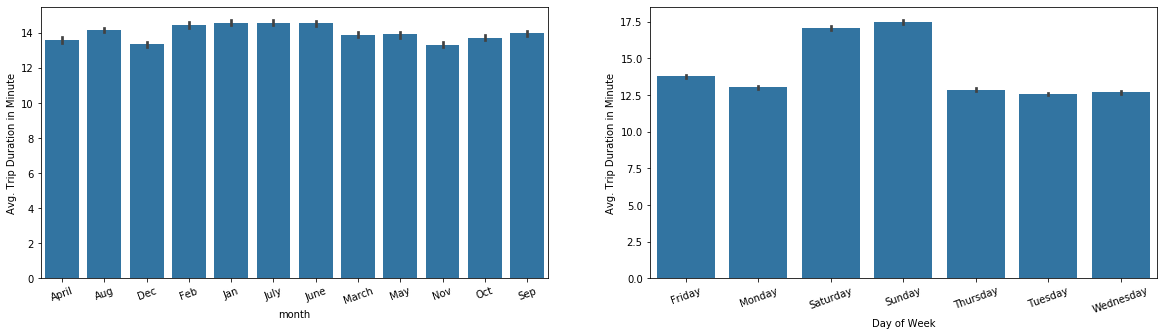

In [20]:
plt.figure(figsize= [20,5])
# trip distribution over months
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 2
sb.barplot(data=df, x='month', y='duration', color=base_color);
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation=20);

# trip distribution over months
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sb.barplot(data=df, x='weekday', y='duration', color=base_color);
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation=20);

> The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal workdays, while more casual flexible use on weekends. 

> Starting from January, the average usage time has shown an increasing trend almost all the way till October. The average longest trips happened during the summer months, around June, and July, and, which probably has a lot to do with the weather in the area. however, the difference was not more than three minutes.

Weekly/ annually usage between end-users

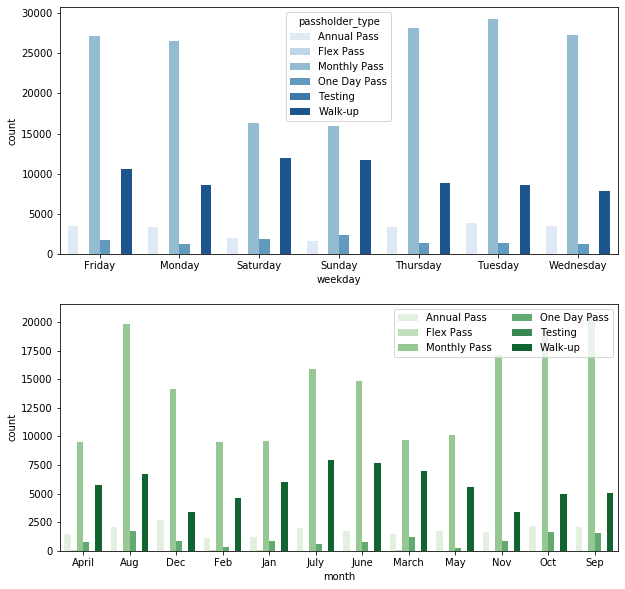

In [21]:
plt.figure(figsize = [10, 10])

# subplot 1: for th weekdays
plt.subplot(2, 1, 1)
sb.countplot(data = df, x = 'weekday', hue = 'passholder_type', palette = 'Blues')


# subplot 2: for the months
ax = plt.subplot(2, 1, 2)
sb.countplot(data = df, x = 'month', hue = 'passholder_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

> There was much more subscriber usage than casual customers overall. The drop in volume on weekends for monthly-pass holders indicates that they primarily ride bikes for work commute during workdays, whereas almost the opposite pattern of a slight increase of use for a single ride plan (Walk-up) customers on weekends demonstrates that the use was more for leisure/touring and relaxing purposes.  

> All riders for the most have increased the usages during the summer months. The usage was clearly not popular during the winter season like November, December, and January likely due to the weather. as was indicated previously 

<a id='Mult'></a>
## Multivariate Exploration

How does the average trip duration vary in weekdays?

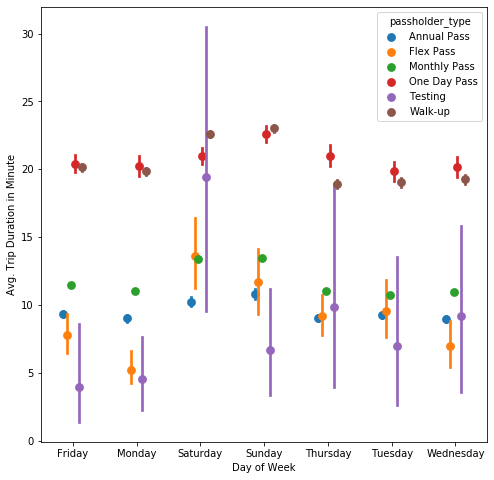

In [22]:
plt.figure(figsize = [8, 8])
sb.pointplot(data=df, x='weekday', y='duration', hue='passholder_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

> It can be seen from the above plot that users who have annual/monthly/ flex- passes ride much shorter/quicker trips compared to other riders on each day of the week. All user types have an obvious increase in trip duration on Saturdays and Sundays over weekends, especially for casual riders. Royal customer usage seems to be more efficient than others in overall and maintained a very consistent average duration Monday through Friday.   

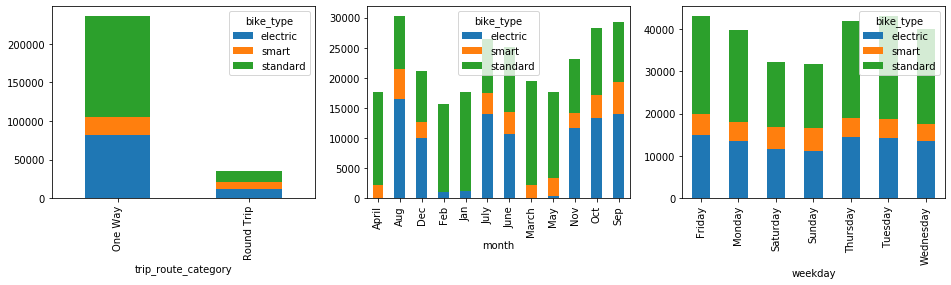

In [23]:
# Then , let's look at other there trip_route_category', 'month', 'dow' variables
categorical_vars = ['trip_route_category', 'month', 'weekday']

fig = plt.figure(figsize=(16, 12))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'bike_type'])[var].count().unstack('bike_type').plot(ax=ax, kind='bar', stacked=True)

<a id='Mult'></a>
## Takeways

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The efficient/short period of usage for royal customers corresponds to their high concentration on  Monday through Friday, indicating the use is primarily for the work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike-sharing system quite different from the royal customers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.        

### Were there any interesting or surprising interactions between features?

The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed. 

### Resources
For graphs and visualization part, i used https://matplotlib.org/devdocs/contents.html webpage for references.

For date and time https://docs.python.org/3/library/datetime.html?highlight=time#module-datetime